This is the first part to our project. Here we will do the following:
1. Download and store data in S3
2. Load data into this notebook
3. Explore our data

# 1. Get Data

In [1]:
!pip install s3fs

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
s3_path = "s3://tk5-huggingface-multiclass-textclassification-bucket/training_data/newsCorpora.csv"
source_df = pd.read_csv(s3_path, 
                        sep='\t', # Tab-separated columns 
                        names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [5]:
source_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:
# Let's make a copy of our dataset to make sure we don't change/remove any data by mistake
df = source_df.copy()
df

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229190251
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,1409229190508
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,1409229190771
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,1409229191071


# 2. Exploratory Data Analysis

In this section we will understand our data:
- Is the dataset balanced
- Does it have enough examples for each category
- Visualize!

In [7]:
# Keep only the Title and Category columns - we don't need the others
df = df[['TITLE', 'CATEGORY']]
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [11]:
# Just to check what categories our dataset has
df.drop_duplicates(subset=['CATEGORY'], keep='first')

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
944,Titanfall Review Roundup,t
2169,George Zimmerman Has an Armed Life on the Move,e
4207,Grown-ups: Put down the smartphones at mealtime,m


In [9]:
# Now, let's transform the CATEGORY classes into clearer representations (e.g., instead of 'b' we want to show 'BUSINESS')

category_dict = {
    'b': 'BUSINESS',
    't': 'SCIENCE',
    'e': 'ENTERTAINMENT',
    'm': 'HEALTH'
}

In [16]:
# Creating a helper function through which we will update the Category names in the dataframe
def update_category(x, dictionary: dict):
    return dictionary.get(x)

In [19]:
df['CATEGORY_FINAL'] = df['CATEGORY'].apply(lambda x: update_category(x, dictionary=category_dict))

In [20]:
# Let's also show the first 3 entries for each category
df.groupby('CATEGORY_FINAL').head(3)

,TITLE,CATEGORY,CATEGORY_FINAL
0,"Fed official says weak data caused by weather,...",b,BUSINESS
1,Fed's Charles Plosser sees high bar for change...,b,BUSINESS
2,US open: Stocks fall after Fed official hints ...,b,BUSINESS
944,Titanfall Review Roundup,t,SCIENCE
945,Titanfall review: my buddy,t,SCIENCE
946,Respawn: Titanfall's server stability is in Mi...,t,SCIENCE
2169,George Zimmerman Has an Armed Life on the Move,e,ENTERTAINMENT
2170,George Zimmerman Signs Autographs At Florida G...,e,ENTERTAINMENT
2171,George Zimmerman Signed Autographs at an Orlan...,e,ENTERTAINMENT
4207,Grown-ups: Put down the smartphones at mealtime,m,HEALTH


Looks good!

In [25]:
# Let's just keep the last CATEGORY_FINAL column and rename it simply to CATEGORY - just boiler plate code here
df = df[['TITLE', 'CATEGORY_FINAL']]
df = df.rename(columns={'CATEGORY_FINAL': 'CATEGORY'})
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",BUSINESS
1,Fed's Charles Plosser sees high bar for change...,BUSINESS
2,US open: Stocks fall after Fed official hints ...,BUSINESS
3,"Fed risks falling 'behind the curve', Charles ...",BUSINESS
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,BUSINESS


In [32]:
# Now, will create a helper function to pull random titles by category of choice
import random

def get_random_title(dataframe, category, n: int = 1, random_state: int = None):
    """
    This function will output a title from the dataframe, based on the specified category
    """
    filtered_df = dataframe[dataframe['CATEGORY'] == category]

    return filtered_df.sample(n=n, random_state=random_state)

In [38]:
get_random_title(dataframe=df, category='ENTERTAINMENT', n=3, random_state=42)

,TITLE,CATEGORY
59033,Mila & Ashton's Baby Joy!,ENTERTAINMENT
254184,Slasher attacks Japan pop girl group AKB48 at ...,ENTERTAINMENT
395190,'The Hobbit' Part 3 News: First Official Tease...,ENTERTAINMENT


Let's make some visualizations to see if our data is well-balanced to fine tune our model

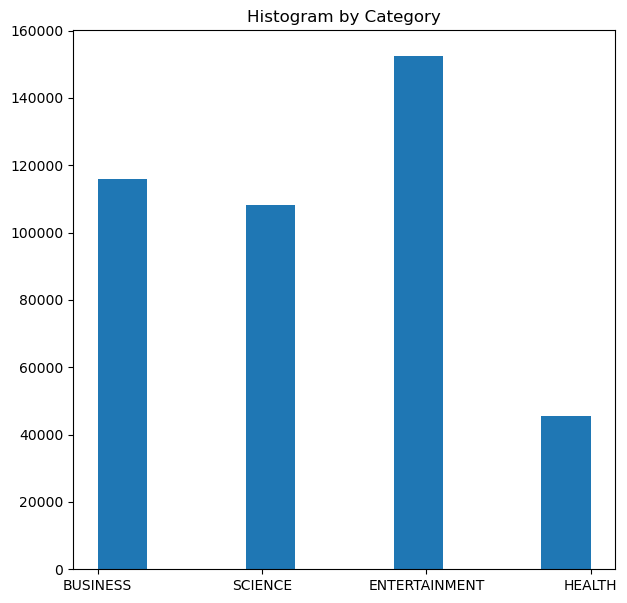

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.hist(df['CATEGORY'])
plt.title('Histogram by Category')
plt.show();

It seems like the Health category has a lot less examples than the other categories. 
However, it does still contain about 45K cases which should be good enough to fine-tune our pre-trained DistilBERT model for the News Headlines sentiment analysis!